<a href="https://colab.research.google.com/github/MatteoOnger/NIAC_Project/blob/dev/NIAC_PMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NIAC Project: Pacman Maze Solver**

*   **Authors:** Stefano Capelli, Matteo Onger
*   **Date:** March 2025

**Documentation**:
*   Gymnasium: [website](https://gymnasium.farama.org/)
*   Pacman Maze game: [description](https://www.scallop-lang.org/ssnp24/index.html#section-17:~:text=2%3A%20PacMan%20Agent-,In,-this%20part%2C%20we)
*   Scallop & Scallopy: [paper](https://www.researchgate.net/publication/369945806_Scallop_A_Language_for_Neurosymbolic_Programming), [repository](https://github.com/scallop-lang/scallop), [website](https://www.scallop-lang.org/)

**Notes**:
*   ...

In [1]:
# download project repository
!git clone -b dev https://github.com/MatteoOnger/NIAC_Project.git

# download Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh

# download Scallopy 0.2.4 (Python 3.10)
!wget https://github.com/scallop-lang/scallop/releases/download/0.2.4/scallopy-0.2.4-cp310-cp310-manylinux_2_27_x86_64.whl

Cloning into 'NIAC_Project'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 281 (delta 38), reused 51 (delta 29), pack-reused 215 (from 1)
Receiving objects: 100% (281/281), 652.94 KiB | 15.18 MiB/s, done.
Resolving deltas: 100% (130/130), done.
--2025-04-14 09:54:49--  https://repo.anaconda.com/miniconda/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153120581 (146M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_25.1.1-2-Linux-x86_64.sh’

Miniconda3-py311_25 100%[===================>] 146.03M   181MB/s    in 0.8s    

2025-04-14 09:54:50 (181 MB/s) - ‘Miniconda3-py311_25.1.1-2-Linux-x86_64.sh’ saved [153120581/153120581]

--2025-04-14

In [2]:
# install Miniconda
%env PYTHONPATH=

!chmod +x /content/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh
!bash Miniconda3-py311_25.1.1-2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

env: PYTHONPATH=
PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [3]:
# force creation of the virtual environment 'niac'
!conda env remove -n niac -y || true
!conda env create -f /content/NIAC_Project/environment.yml -y
!conda env list


EnvironmentLocationNotFound: Not a conda environment: /usr/local/envs/niac

Channels:
 - conda-forge
 - menpo
 - defaults
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



mkl-2024.2.2         | 118.9 MB  | :   0% 0/1 [00:00<?, ?it/s]
libtorch-2.6.0       | 51.9 MB   | :   0% 0/1 [00:00<?, ?it/s]

python-3.10.17       | 23.9 MB   | :   0% 0/1 [00:00<?, ?it/s]


pytorch-2.6.0        | 23.5 MB   | :   0% 0/1 [00:00<?, ?it/s]



libdb-6.2.32         | 23.3 MB   | :   0% 0/1 [00:00<?, ?it/s]




rav1e-0.6.6          | 14.7 MB   | :   0% 0/1 [00:00<?, ?it/s]





icu-75.1             | 11.6 MB   | :   0% 0/1 [00:00<?, ?it/s]






numpy-1.26.4         | 6.7 MB    | :   0% 0/1 [00:00<?, ?it/s]







sympy-1.13.3         | 4.3 MB    | :   0% 0/1 [00:00<?, ?it/s]








libglib-2.84.1       | 3.8 MB

---
## Installation check

In [4]:
# ---- Hello world in Scallopy 0.2.4 ----
%%bash
source activate niac
python3

import sys
print(f"-----\nCurrent Python version: {sys.version}\n-----")

import scallopy
ctx = scallopy.ScallopContext()

ctx.add_relation("hello", str)
ctx.add_facts("hello", [("Hello World",)])
ctx.run()

print(list(ctx.relation("hello")))
quit()

-----
Current Python version: 3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:19:12) [GCC 13.3.0]
-----
[('Hello World',)]


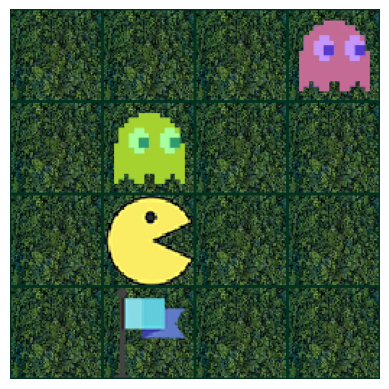

Tot reward:0.0


In [5]:
# ---- Random agent plays pacman maze ----
import matplotlib.pyplot as plt
import numpy as np
import time

from IPython.display import clear_output
from NIAC_Project.pacman.arena import AvoidingArena

env = AvoidingArena(render_mode="rgb_array", grid_dim=(4,4), max_num_moves=10, num_enemies=3)
env.reset()

tot_reward = 0
end_episode = False

while not end_episode:
    action = np.random.randint(0, 4)
    observation, reward, terminated, truncated, info = env.step(action)
    tot_reward += reward

    clear_output(wait=True)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show()
    time.sleep(.5)

    end_episode = terminated or truncated

env.close()
print(f"Tot reward:{tot_reward}")

---
## .......

In [6]:
%%bash
source activate niac
python3

import logging
import os
import sys
import torch
import warnings

from NIAC_Project.agents.dqn_agent import DQNAgent as Agent
from NIAC_Project.agents.utils import channel_l2f, normalize_img
from NIAC_Project.pacman.arena import AvoidingArena


os.environ['XDG_RUNTIME_DIR'] = '/tmp/runtime-dir'
warnings.filterwarnings("ignore", category=RuntimeWarning)
logging.basicConfig(format='%(asctime)s | %(levelname)s | %(name)s:%(funcName)s - %(message)s', force=True)
for name in logging.root.manager.loggerDict:
        if name.startswith('NIAC_Project'):
            logging.getLogger(name).setLevel(logging.DEBUG)

print(f"-----\nCurrent Python version: {sys.version}\n-----")


arena = AvoidingArena(render_mode="rgb_array", grid_dim=(3, 3), max_num_moves=9, num_enemies=2)
arena.reset()

agent = Agent(arena, batch_size=8)
agent.train(num_episodes=16, num_epochs=4)

quit()

-----
Current Python version: 3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:19:12) [GCC 13.3.0]
-----


[Train Epoch 1] Avg Loss: 0.03702080249786377, Success: 8/16 (50.00%): 100%|██████████| 16/16 [00:09<00:00,  1.75it/s]
[Test Epoch 1] Success 5/16 (31.25%): 100%|██████████| 16/16 [00:01<00:00, 15.26it/s]
[Train Epoch 2] Avg Loss: 0.0428331159055233, Success: 5/16 (31.25%): 100%|██████████| 16/16 [00:10<00:00,  1.51it/s]
[Test Epoch 2] Success 7/16 (43.75%): 100%|██████████| 16/16 [00:00<00:00, 21.90it/s]
[Train Epoch 3] Avg Loss: 0.025422362610697746, Success: 7/16 (43.75%): 100%|██████████| 16/16 [00:09<00:00,  1.62it/s]
[Test Epoch 3] Success 3/16 (18.75%): 100%|██████████| 16/16 [00:00<00:00, 19.32it/s]
[Train Epoch 4] Avg Loss: 0.027398115023970604, Success: 7/16 (43.75%): 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]
[Test Epoch 4] Success 9/16 (56.25%): 100%|██████████| 16/16 [00:00<00:00, 26.04it/s]


---
## Extra

In [7]:
# ---- Modified logic comp. to include different rewards ----
%%bash
source activate niac
python3

import scallopy
import torch
from enum import Enum


# action space
class ACTION(Enum):
    RIGHT = 0
    UP = 1
    LEFT = 2
    DOWN = 3

# possible rewards
rewards = {
    "default": -1.0,
    "on_success": 5.0,
    "on_failure": -5.0,
}

# grid size
X, Y = 3, 3
# max number of moves (L) and min reward (R)
L, R = 3, -100.

# list of all the nodes
nodes = [(i,j) for i in range(X) for j in range(Y)]

# input data from the neural component
agent_p = torch.zeros(X, Y)
target_p = torch.zeros(X, Y)
enemy_p  = torch.zeros(X, Y)
empty_p = torch.zeros(X, Y)

agent_p[1, 0] = 1.0
target_p[2, 2] = 1.0
enemy_p[1, 1] = 1.0
empty_p = torch.ones(X, Y) - (target_p + enemy_p)

# compute expected reward per cell
expected_rewards = rewards["on_success"] * target_p + rewards["on_failure"] * enemy_p + rewards["default"] * empty_p

# print the expected rewards
print("Grid expected rewards:")
print(expected_rewards, "\n")


# base context
ctx = scallopy.ScallopContext(provenance='difftopkproofs')
ctx.add_relation("actor", (int, int))
ctx.add_relation("target", (int, int))
ctx.add_relation("node", (int, int, float))

ctx.add_facts("actor", [(agent_p[node], node) for node in nodes])
ctx.add_facts("target", [(target_p[node], node) for node in nodes])
ctx.add_facts(
    "node",
    [(1.0, (node + (expected_rewards[node],))) for node in nodes],
)

# basic connectivity
ctx.add_rule(f"edge(x, y, xp, y, {ACTION.RIGHT.value}) = node(x, y, _) and node(xp, y, _) and xp == x + 1")
ctx.add_rule(f"edge(x, y, x, yp, {ACTION.UP.value})    = node(x, y, _) and node(x, yp, _) and yp == y + 1")
ctx.add_rule(f"edge(x, y, xp, y, {ACTION.LEFT.value})  = node(x, y, _) and node(xp, y, _) and xp == x - 1")
ctx.add_rule(f"edge(x, y, x, yp, {ACTION.DOWN.value})  = node(x, y, _) and node(x, yp, _) and yp == y - 1")

# path for connectivity
ctx.add_rule(f"path(x, y, x, y, 1, r) = node(x, y, r)") # path(node_i, node_j, num_moves, reward)
ctx.add_rule(f"path(x, y, xp, yp, 1, r) = edge(x, y, xp, yp, _) and node(xp, yp, r)")
ctx.add_rule(f"path(x, y, xpp, ypp, {L}, {R}) = node(x, y, _) and node(xpp, ypp, _) and $abs(x - xpp) + $abs(y - ypp) > 1")
ctx.add_rule(f"path(x, y, xpp, ypp, l + 1, rp + rn) = path(x, y, xp, yp, l, rp) and edge(xp, yp, xpp, ypp, _) and node(xpp, ypp, rn) and path(x, y, xpp, ypp, _, r) and r < rp + rn and l + 1 <= {L}")


# clone and run base context
ctx1 = ctx.clone()
ctx1.run()


# list of all possible paths in max L moves
paths = ctx1.relation("path")

# find best path between each pair of nodes
best_paths = dict()
for path in paths:
    p = path[1]
    if p[:4] not in best_paths or best_paths[p[:4]] < p[5]:
        best_paths[p[:4]] = p[5]

# print best paths
print(f"Best paths (node_ix, node_iy, node_jx, node_jy: reward):\n   {best_paths}")


# clone and run context 2
ctx2 = ctx.clone()
ctx2.add_relation("best_path", (int, int, int, int, float)) # best_path(node_i, node_j, reward)

ctx2.add_facts(
    "best_path",
    [(1.0, k + (v,)) for k, v in best_paths.items()]
)

# next action and next position
ctx2.add_rule("next_position(xp, yp, a, r) = actor(x, y) and edge(x, y, xp, yp, a) and node(xp, yp, r)")
ctx2.add_rule("next_action(a) = next_position(x, y, a, _) and best_path(x, y, gx, gy, _) and target(gx, gy)")
ctx2.run()


# print final results
print(f"Next position (node_x, node_y, action, reward):\n   {list(ctx2.relation('next_position'))}")
print(f"Next action:\n   {list(ctx2.relation('next_action'))}")

quit()

Grid expected rewards:
tensor([[-1., -1., -1.],
        [-1., -5., -1.],
        [-1., -1.,  5.]]) 

Best paths (node_ix, node_iy, node_jx, node_jy: reward):
   {(0, 0, 0, 0): -1.0, (0, 0, 0, 1): -1.0, (0, 0, 0, 2): -2.0, (0, 0, 1, 0): -1.0, (0, 0, 1, 1): -6.0, (0, 0, 1, 2): -3.0, (0, 0, 2, 0): -2.0, (0, 0, 2, 1): -3.0, (0, 0, 2, 2): -100.0, (0, 1, 0, 0): -1.0, (0, 1, 0, 1): -1.0, (0, 1, 0, 2): -1.0, (0, 1, 1, 0): -2.0, (0, 1, 1, 1): -5.0, (0, 1, 1, 2): -2.0, (0, 1, 2, 0): -3.0, (0, 1, 2, 1): -6.0, (0, 1, 2, 2): 3.0, (0, 2, 0, 0): -2.0, (0, 2, 0, 1): -1.0, (0, 2, 0, 2): -1.0, (0, 2, 1, 0): -3.0, (0, 2, 1, 1): -6.0, (0, 2, 1, 2): 3.0, (0, 2, 2, 0): -100.0, (0, 2, 2, 1): 3.0, (0, 2, 2, 2): 4.0, (1, 0, 0, 0): -1.0, (1, 0, 0, 1): -2.0, (1, 0, 0, 2): -3.0, (1, 0, 1, 0): -1.0, (1, 0, 1, 1): -5.0, (1, 0, 1, 2): -6.0, (1, 0, 2, 0): -1.0, (1, 0, 2, 1): -2.0, (1, 0, 2, 2): 3.0, (1, 1, 0, 0): -2.0, (1, 1, 0, 1): -1.0, (1, 1, 0, 2): -2.0, (1, 1, 1, 0): -1.0, (1, 1, 1, 1): -5.0, (1, 1, 1, 2): 3.0, 

In [ ]:
# ---- Custom provenance ----
class MyProvenance(scallopy.provenance.ScallopProvenance):
    def __init__(self, min :float, max :float):
        super(MyProvenance, self).__init__()
        self.min = min
        self.max = max
        return

    def name(self):
        return "custom-provenance"

    def zero(self):
        return self.min

    def one(self):
        return self.max

    def add(self, t1, t2):
        raise Exception("Not implemented")

    def mult(self, t1, t2):
        return torch.clip(t1 + t2, min=self.min, max=self.max)

    def negate(self, t):
        return torch.clip(-t, min=self.min, max=self.max)

    def saturated(self, t1, t2):
        return bool(t1 > t2)